In [62]:
import time
import re
import pandas as pd
import numpy as np

import spacy

import matplotlib.pyplot as plt
%matplotlib inline


import os
os.getcwd()

'C:\\Users\\dkaithav\\Machine-Learning-experiments\\Coursera_Document_Similarity\\Document_Similarity'

In [2]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 6018-0726

 Directory of C:\Users\dkaithav\Machine-Learning-experiments\Coursera_Document_Similarity\Document_Similarity

05/26/2020  06:55 PM    <DIR>          .
05/26/2020  06:55 PM    <DIR>          ..
05/26/2020  06:53 PM    <DIR>          .ipynb_checkpoints
03/28/2019  03:14 PM           687,460 consine_distance.png
03/27/2019  06:55 PM    <DIR>          data
03/28/2019  04:25 PM           577,676 Document Similarity.ipynb
03/28/2019  04:30 PM             6,869 Task 2.ipynb
03/28/2019  04:30 PM             7,082 Task 3.ipynb
03/28/2019  04:29 PM           117,643 Task 4.ipynb
03/28/2019  04:29 PM           172,372 Task 5.ipynb
03/28/2019  04:28 PM           285,634 Task 6.ipynb
03/28/2019  04:27 PM           337,716 Task 7.ipynb
03/28/2019  04:27 PM           486,042 Task 8.ipynb
03/27/2019  07:09 PM             1,716 textDB.py
05/26/2020  06:55 PM               983 Untitled.ipynb
03/27/2019  07:09 PM    <DIR>          __pycac

In [7]:
# path to the test datasets
FIXTURES = os.path.join(os.getcwd(), 'data')
FIXTURES

'C:\\Users\\dkaithav\\Machine-Learning-experiments\\Coursera_Document_Similarity\\Document_Similarity\\data'

In [14]:
# path to hobbies
# store it in a dictionary

datasets = {'hobbies': os.path.join(FIXTURES, 'hobbies')}
path = datasets['hobbies']
path

'C:\\Users\\dkaithav\\Machine-Learning-experiments\\Coursera_Document_Similarity\\Document_Similarity\\data\\hobbies'

In [10]:
os.listdir(datasets['hobbies'])

['books', 'cinema', 'cooking', 'gaming', 'README.md', 'sports']

In [18]:
# read the categories within directory
# check if there are subdirectories and if so the folder are catgories
categories = [cat for cat in os.listdir(path) if os.path.isdir(os.path.join(path, cat))]
categories

['books', 'cinema', 'cooking', 'gaming', 'sports']

In [19]:
files =[] # for storing all filenames
data = [] # data from text files
target = [] # holds the string for each category, eg: books, cinema, etc

In [23]:
%%time
# browse through each catgeory

for cat in categories:
    for file in os.listdir(os.path.join(path, cat)):
        # store the filenames
        files.append(os.path.join(path, cat, file))
        # storing category names
        target.append(cat)
        
        # read the data and store
        # need to specify the encoding or else will get error
        with open(os.path.join(path, cat, file), 'r', encoding='utf8') as f:
            # read the entire contents of the file and store
            data.append(f.read())

Wall time: 207 ms


In [27]:
print('Number of text files added across different categories', len(data))

Number of text files added across different categories 449


In [28]:
target[0]

'books'

In [29]:
data[0]

"\n\nFrom \n\n to \n\n, Oscar voters can't get enough of book adaptations. Nowhere is this trend more obvious than in the Best Actor and Best Actress categories.\n\n\n\nYes, movies have been based on books and true stories since the silent film era, but this year represents a notable spike: While true story adaptations remain relatively flat, the number of best actor or actress nominees who starred in movies based on books have reached a new peak this year.\n\n\n\nAn even bigger indicator? Movies in which book and true story adaptation overlap. That has been a clear path to Oscar glory in the Best Actor category.\n\n\n\nAll of this year's Best Actor nominees are from movies based on books \n\n true stories, except for one: Matt Damon's turn as a stranded astronaut in the science fiction thriller \n\n.\n\n\n\nHowever, Oscar voters don't seem to favor true stories as much in the Best Actress category. While two out of the past three Best Actress winners have been from films based on book

In [40]:
data[0].split('\n\n\n')

["\n\nFrom \n\n to \n\n, Oscar voters can't get enough of book adaptations. Nowhere is this trend more obvious than in the Best Actor and Best Actress categories.",
 '\nYes, movies have been based on books and true stories since the silent film era, but this year represents a notable spike: While true story adaptations remain relatively flat, the number of best actor or actress nominees who starred in movies based on books have reached a new peak this year.',
 '\nAn even bigger indicator? Movies in which book and true story adaptation overlap. That has been a clear path to Oscar glory in the Best Actor category.',
 "\nAll of this year's Best Actor nominees are from movies based on books \n\n true stories, except for one: Matt Damon's turn as a stranded astronaut in the science fiction thriller \n\n.",
 "\nHowever, Oscar voters don't seem to favor true stories as much in the Best Actress category. While two out of the past three Best Actress winners have been from films based on booksâ€

In [59]:
temp = [re.sub('\n', "", row) for row in data[0].split('\n\n\n')]
temp

["From  to , Oscar voters can't get enough of book adaptations. Nowhere is this trend more obvious than in the Best Actor and Best Actress categories.",
 'Yes, movies have been based on books and true stories since the silent film era, but this year represents a notable spike: While true story adaptations remain relatively flat, the number of best actor or actress nominees who starred in movies based on books have reached a new peak this year.',
 'An even bigger indicator? Movies in which book and true story adaptation overlap. That has been a clear path to Oscar glory in the Best Actor category.',
 "All of this year's Best Actor nominees are from movies based on books  true stories, except for one: Matt Damon's turn as a stranded astronaut in the science fiction thriller .",
 "However, Oscar voters don't seem to favor true stories as much in the Best Actress category. While two out of the past three Best Actress winners have been from films based on booksâ€”Julianne Moore in  and Jenn

In [57]:
!pip install WordCloud

In [58]:
from wordcloud import WordCloud, STOPWORDS

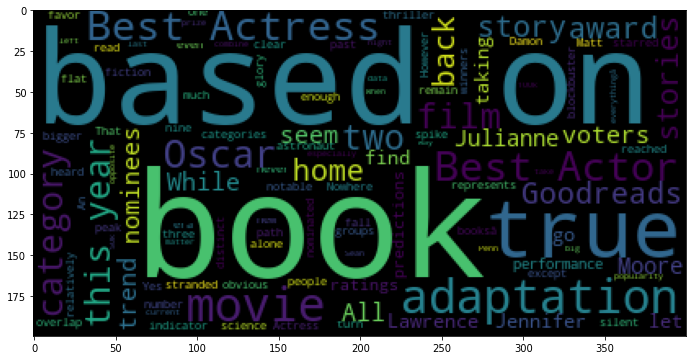

In [67]:
wordcloud = WordCloud().generate(data[0])
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)

In [104]:
data_combined = [[re.sub('\n', "", row).lower() for row in doc.split('\n\n\n')] for doc in data]

In [105]:
data_combined_flatten= []
for sublist in data_combined:
    for item in sublist:
        data_combined_flatten.append(item)
        

In [110]:
data_combined_flatten

["from  to , oscar voters can't get enough of book adaptations. nowhere is this trend more obvious than in the best actor and best actress categories.",
 'yes, movies have been based on books and true stories since the silent film era, but this year represents a notable spike: while true story adaptations remain relatively flat, the number of best actor or actress nominees who starred in movies based on books have reached a new peak this year.',
 'an even bigger indicator? movies in which book and true story adaptation overlap. that has been a clear path to oscar glory in the best actor category.',
 "all of this year's best actor nominees are from movies based on books  true stories, except for one: matt damon's turn as a stranded astronaut in the science fiction thriller .",
 "however, oscar voters don't seem to favor true stories as much in the best actress category. while two out of the past three best actress winners have been from films based on booksâ€”julianne moore in  and jenn

### building a simple wordcloud from the entire data prior to cleaning

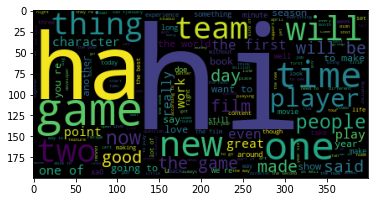

In [112]:
wordcloud = WordCloud().generate(str(data_combined_flatten))
plt.imshow(wordcloud)

### performing some text cleaning

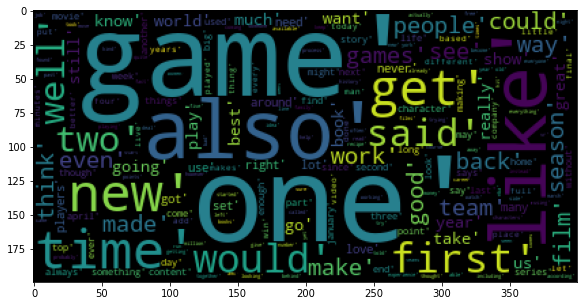

Wall time: 3.74 s


In [145]:
%%time
cleaned_tokens=[]
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
for row in data_combined_flatten:
    text = re.findall('[A-Za-z]{2,}', row)
    # removing stop words
    cleaned_tokens.append([word for word in text if word not in stop])

# use wordcloud for the cleaned tokens
word_cloud = WordCloud().generate(str(cleaned_tokens))
plt.figure(figsize=(12,5))
plt.imshow(word_cloud)
plt.show()

In [146]:
cleaned_tokens.flatten()

AttributeError: 'list' object has no attribute 'flatten'